In [2]:
import numpy as np
import matplotlib.pyplot as plt

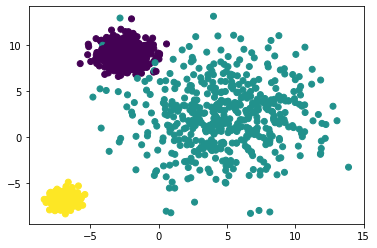

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
K = 3
m, n = X.shape

random_row = np.random.randint(low=0, high=m, size=K)
mean = np.array([X[idx,:] for idx in random_row]).T

cov = np.array([np.cov(X.T) for _ in range(K)])

pi = np.full((K, ), fill_value=1/K)
 
r = np.full(shape=(m, K), fill_value=1/K)

newloss smaller? -37089.51383168344
newloss difference:  37089.51383168344
newloss smaller? -167226.72323077143
newloss difference:  62167.91108322126
newloss smaller? -585250.6617833454
newloss difference:  5997.702699102112
newloss smaller? -638376.8430462815
newloss difference:  2764.784931982169


Text(0.5, 1.0, 'Final')

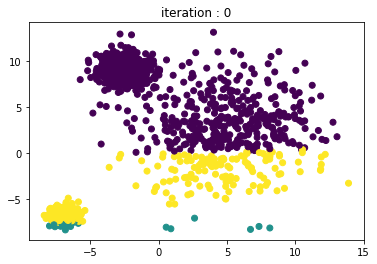

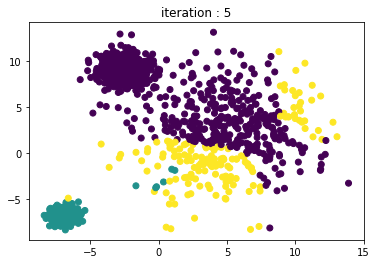

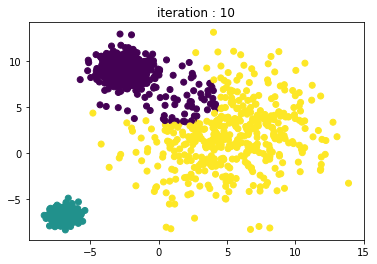

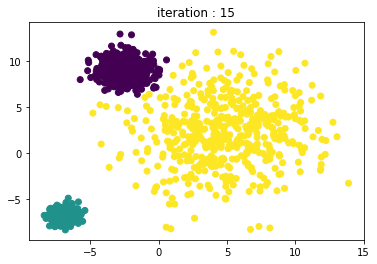

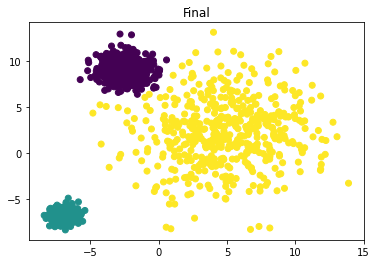

In [7]:
from scipy.stats import multivariate_normal
import math 

max_iter = 20
oldloss = 0

for iteration in range(max_iter):
    
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            r[i, k] = pi[k] * xi_pdf
        r[i] /= np.sum(r[i])
    
    newloss = 0
    for i in range(m):
        for k in range(K):
            newloss += math.log(pi[k])
            newloss += multivariate_normal.logpdf(X[i], mean=mean[:, k], cov=cov[k])
    
    
    if iteration % 5 == 0:
        preds = np.argmax(r, axis=1)
        plt.figure()
        plt.scatter(X[:,0], X[:,1], c=preds)
        plt.title(f"iteration : {iteration}")
        print("newloss smaller?", newloss)
        print("newloss difference: ", math.fabs(newloss - oldloss))
        
    if math.fabs(newloss - oldloss) < 5:
        print("final loss: ", newloss)
        print("final difference: ", math.fabs(newloss - oldloss))
        break
    oldloss = newloss
    
    NK = np.sum(r, axis=0)
    assert NK.shape == (K,)
    
    pi = NK / m
    assert pi.shape == (K,)
    
    mean = (X.T @ r) / NK
    assert mean.shape == (n, K)
    
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i,k]*(X_mean@X_mean.T)
        cov[k] /= NK[k]
    assert cov.shape == (K, n, n)

yhat = np.argmax(r, axis=1)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final")